In [1]:
import matplotlib.pyplot as plt
import numpy as np

from fitness_observer import FitnessObserver
from labs_simulation import run_genetic_algorithm

In [2]:
iterations_axis = [i for i in range(100)]
repetitions_number = 10

In [3]:
from typing import List, Tuple

def get_fitness_mean_and_std(fitness_observers: List[FitnessObserver]) -> Tuple[List, List]:
    fitness_mean = [np.mean([fitness_observer.fitness[i] for fitness_observer in fitness_observers])
                     for i in range(100)]
    fitness_std = [np.std([fitness_observer.fitness[i] for fitness_observer in fitness_observers])
                     for i in range(100)]
    return fitness_mean, fitness_std

In [4]:
def draw_fitness_plots(fitness_observers: List[FitnessObserver], mean_fitness: List[float], algorithm_name: str):
    figure, axis = plt.subplots(1, 2, figsize=(12, 6))
    figure.tight_layout()
    axis[0].set_title(f"Fitness in {algorithm_name} algorithm")
    for fitness_observer in fitness_observers:
        axis[0].plot(iterations_axis, fitness_observer.fitness[:100])

    axis[1].set_title(f"Mean fitness in {algorithm_name} algorithm")
    axis[1].plot(iterations_axis, mean_fitness)
    plt.show()

def draw_fitness_boxplots(fitness_observers: List[FitnessObserver]):
    figure, axis = plt.subplots(2, 5, figsize=(12, 6))
    figure.tight_layout()
    for i in range(10):
        row = i // 5
        col = i % 5
        axis[row, col].boxplot([fitness_observer.fitness[i * 10] for fitness_observer in fitness_observers])
        axis[row, col].set_title(f"Fitness in iteration {i * 10}")
    plt.show()

## Base algorithm

In [5]:
from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm

In [6]:
base_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in base_fitness_observers:
    run_genetic_algorithm(GeneticAlgorithm, 0.5, observers=[fitness_observer])

[2024-06-02 19:56:29,961] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:56:29,977] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:56:29,994] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:56:29,998] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-02 19:56:34,280] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:56:34,285] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:56:34,287] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:56:34,293] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:56:34,295] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 489
Computing time: 4.32413649559021


[2024-06-02 19:56:37,801] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:56:37,807] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:56:37,809] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:56:37,816] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:56:37,819] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 457
Computing time: 3.5225110054016113


[2024-06-02 19:56:41,329] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:56:41,336] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:56:41,338] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:56:41,343] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:56:41,346] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 441
Computing time: 3.5287773609161377


[2024-06-02 19:56:44,946] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:56:44,951] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:56:44,953] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:56:44,960] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:56:44,961] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 457
Computing time: 3.61482834815979


[2024-06-02 19:56:48,619] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:56:48,620] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:56:48,622] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:56:48,628] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:56:48,629] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 385
Computing time: 3.6693968772888184


[2024-06-02 19:56:52,044] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:56:52,050] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:56:52,051] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:56:52,058] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:56:52,059] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 449
Computing time: 3.4288251399993896


[2024-06-02 19:56:56,074] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:56:56,080] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:56:56,083] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:56:56,092] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:56:56,093] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 449
Computing time: 4.030520677566528


[2024-06-02 19:56:59,778] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:56:59,780] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:56:59,783] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:56:59,791] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:56:59,794] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 473
Computing time: 3.700448513031006


[2024-06-02 19:57:03,608] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:57:03,611] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:03,613] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:03,617] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:03,621] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 457
Computing time: 3.8310844898223877


[2024-06-02 19:57:07,472] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: Genetic algorithm
Fitness: 409
Computing time: 3.862673044204712


In [7]:
base_fitness_mean, base_fitness_std = get_fitness_mean_and_std(base_fitness_observers)

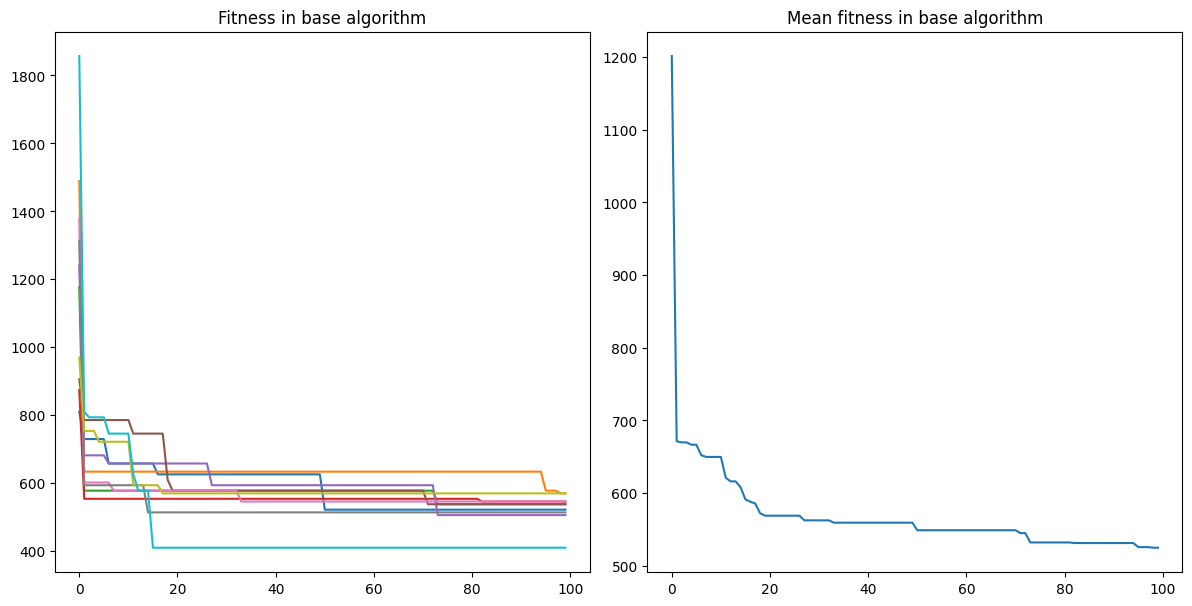

In [8]:
draw_fitness_plots(base_fitness_observers, base_fitness_mean, "base")

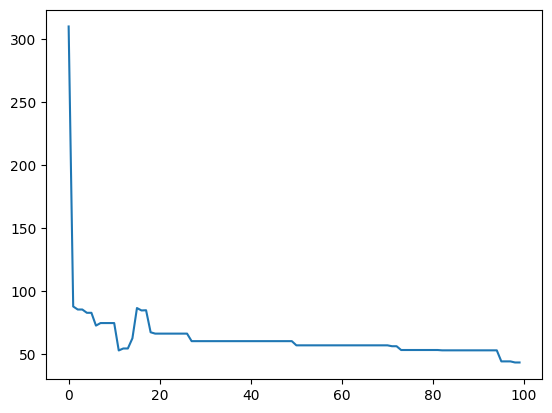

In [9]:
plt.plot(iterations_axis, base_fitness_std)
plt.show()

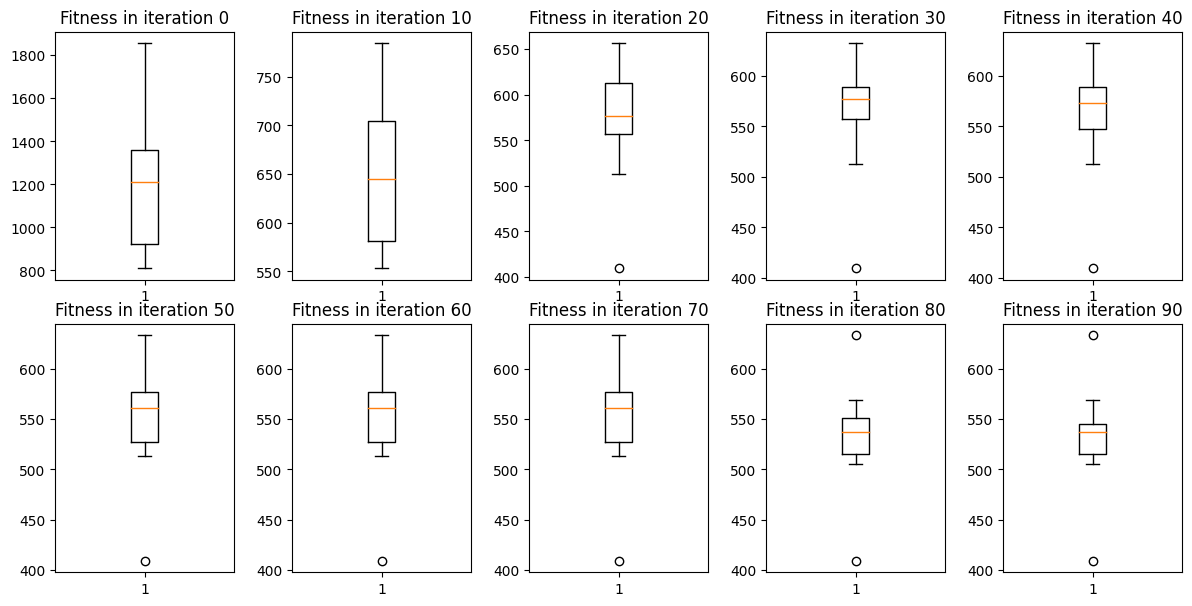

In [10]:
draw_fitness_boxplots(base_fitness_observers)

## Follow Best

In [11]:
from follow_best import FollowBestGA

In [12]:
follow_best_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in follow_best_fitness_observers:
    run_genetic_algorithm(FollowBestGA, 0.5, observers=[fitness_observer])

[2024-06-02 19:57:10,408] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:10,414] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:10,420] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:10,427] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-02 19:57:14,592] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:57:14,598] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:14,600] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:14,607] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:14,608] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 441
Computing time: 4.189990997314453


[2024-06-02 19:57:19,575] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:57:19,576] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:19,579] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:19,586] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:19,587] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 441
Computing time: 4.978517293930054


[2024-06-02 19:57:23,505] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:57:23,506] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:23,508] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:23,515] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:23,516] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 433
Computing time: 3.9298551082611084


[2024-06-02 19:57:27,252] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:57:27,254] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:27,257] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:27,266] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:27,268] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 441
Computing time: 3.7477002143859863


[2024-06-02 19:57:31,325] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:57:31,327] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:31,331] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:31,336] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:31,337] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 401
Computing time: 4.07339072227478


[2024-06-02 19:57:35,141] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:57:35,149] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:35,151] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:35,157] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:35,159] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 409
Computing time: 3.8220183849334717


[2024-06-02 19:57:39,366] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:57:39,367] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:39,370] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:39,376] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:39,377] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 465
Computing time: 4.217991352081299


[2024-06-02 19:57:43,236] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:57:43,243] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:43,245] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:43,252] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:43,253] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 425
Computing time: 3.874554395675659


[2024-06-02 19:57:47,256] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:57:47,259] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:47,263] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:47,276] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:47,277] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 521
Computing time: 4.016143798828125


[2024-06-02 19:57:51,561] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Follow Best' mutation
Fitness: 393
Computing time: 4.308982849121094


In [13]:
follow_best_fitness_mean, follow_best_fitness_std = get_fitness_mean_and_std(follow_best_fitness_observers)

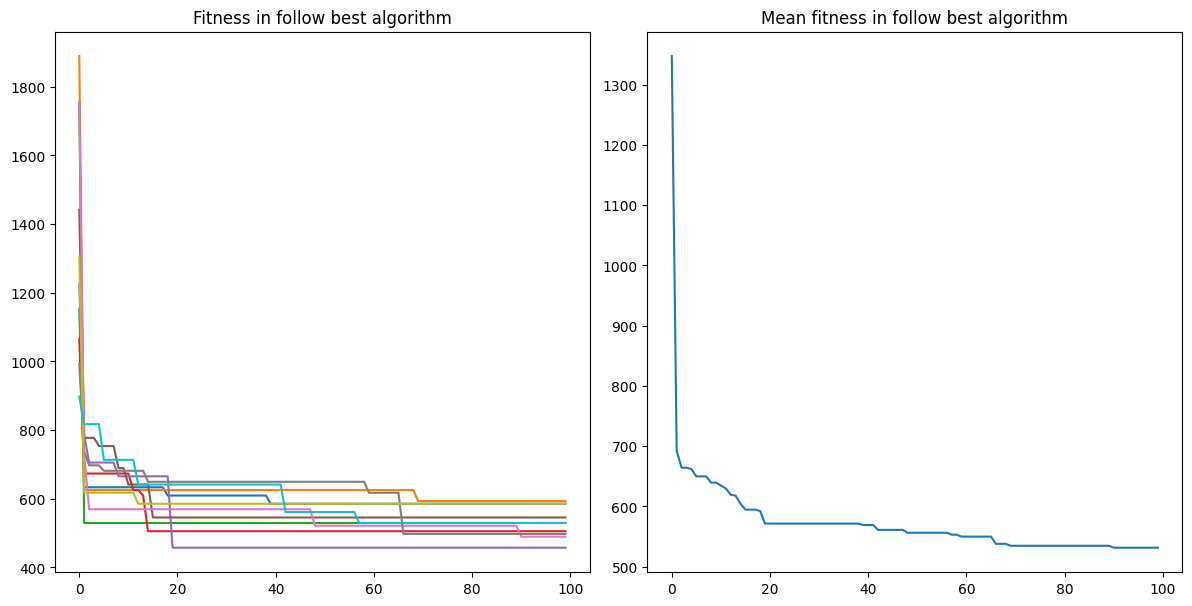

In [14]:
draw_fitness_plots(follow_best_fitness_observers, follow_best_fitness_mean, "follow best")

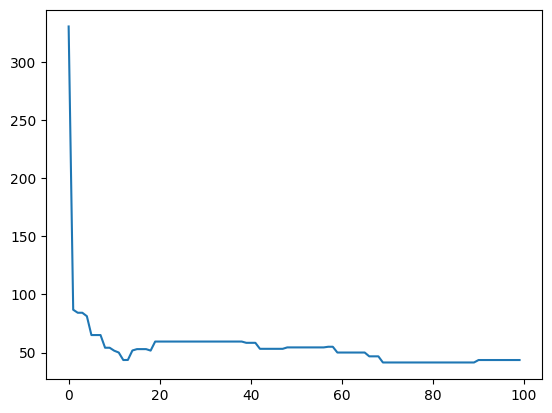

In [15]:
plt.plot(iterations_axis, follow_best_fitness_std)
plt.show()

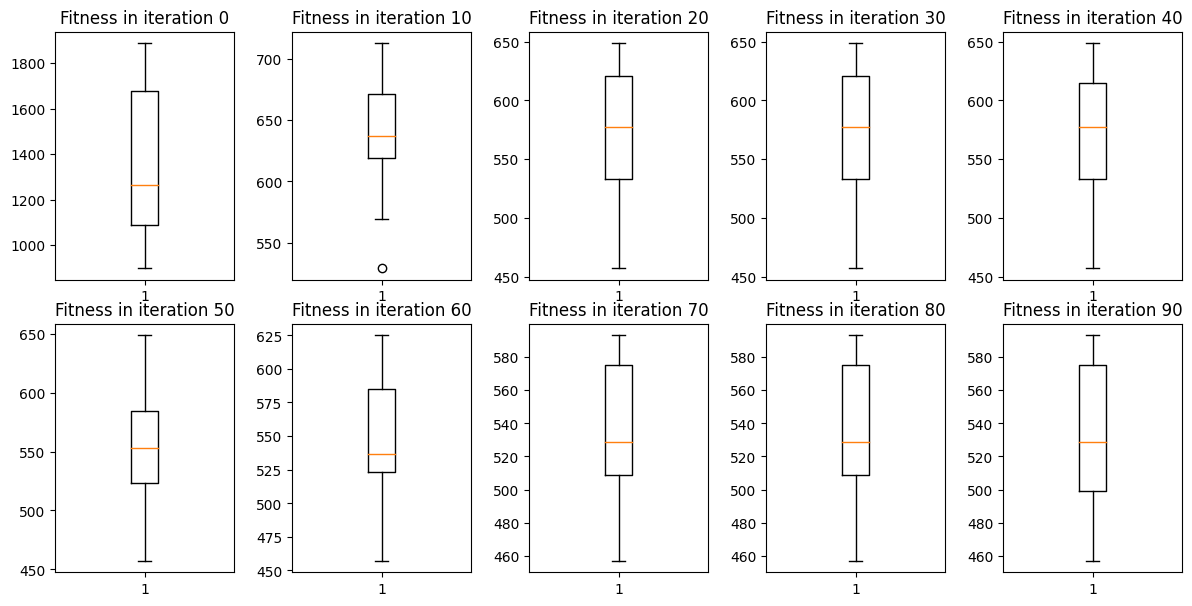

In [16]:
draw_fitness_boxplots(follow_best_fitness_observers)

## Follow Best Distinct

In [17]:
from follow_best_distinct import FollowBestDistinctGA

In [18]:
follow_best_distinct_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in follow_best_distinct_fitness_observers:
    run_genetic_algorithm(FollowBestDistinctGA, 0.5, observers=[fitness_observer])

[2024-06-02 19:57:54,629] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:57:54,635] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:57:54,643] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:57:54,645] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-02 19:58:38,537] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:58:38,537] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:58:38,539] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:58:38,544] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:58:38,545] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 393
Computing time: 43.908692836761475


[2024-06-02 19:59:05,857] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:59:05,861] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:59:05,863] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:59:05,867] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:59:05,867] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 417
Computing time: 27.32398748397827


[2024-06-02 19:59:33,245] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:59:33,247] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:59:33,248] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:59:33,253] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:59:33,254] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 473
Computing time: 27.38558006286621


[2024-06-02 19:59:58,917] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 19:59:58,922] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 19:59:58,923] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 19:59:58,927] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 19:59:58,929] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 489
Computing time: 25.67478370666504


[2024-06-02 20:00:26,140] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:00:26,146] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:00:26,147] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:00:26,153] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:00:26,154] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 457
Computing time: 27.224121570587158


[2024-06-02 20:00:53,644] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:00:53,645] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:00:53,647] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:00:53,652] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:00:53,652] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 425
Computing time: 27.499616384506226


[2024-06-02 20:01:20,904] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:01:20,912] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:01:20,914] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:01:20,918] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:01:20,918] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 473
Computing time: 27.26624894142151


[2024-06-02 20:01:47,210] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:01:47,214] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:01:47,216] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:01:47,221] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:01:47,221] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 457
Computing time: 26.30235266685486


[2024-06-02 20:02:14,232] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:02:14,233] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:02:14,235] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:02:14,241] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:02:14,242] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 425
Computing time: 27.019108533859253


[2024-06-02 20:02:40,264] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 433
Computing time: 26.038179874420166


In [19]:
follow_best_distinct_fitness_mean, follow_best_distinct_fitness_std = get_fitness_mean_and_std(follow_best_distinct_fitness_observers)

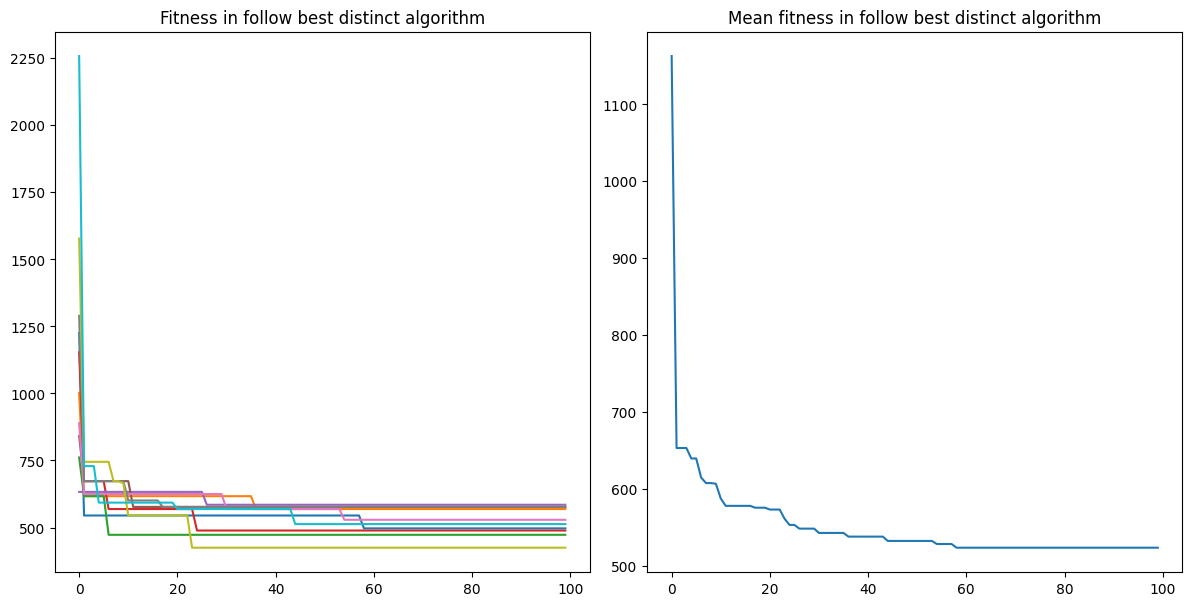

In [20]:
draw_fitness_plots(follow_best_distinct_fitness_observers, follow_best_distinct_fitness_mean, "follow best distinct")

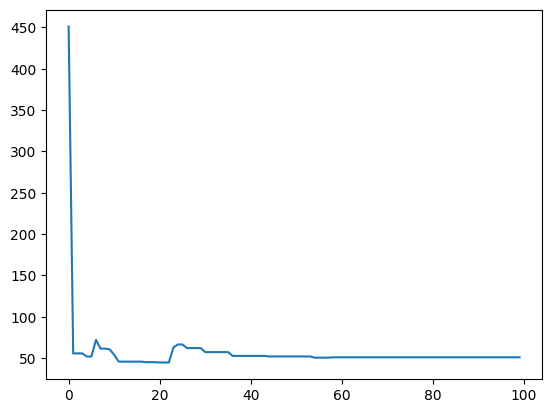

In [21]:
plt.plot(iterations_axis, follow_best_distinct_fitness_std)
plt.show()

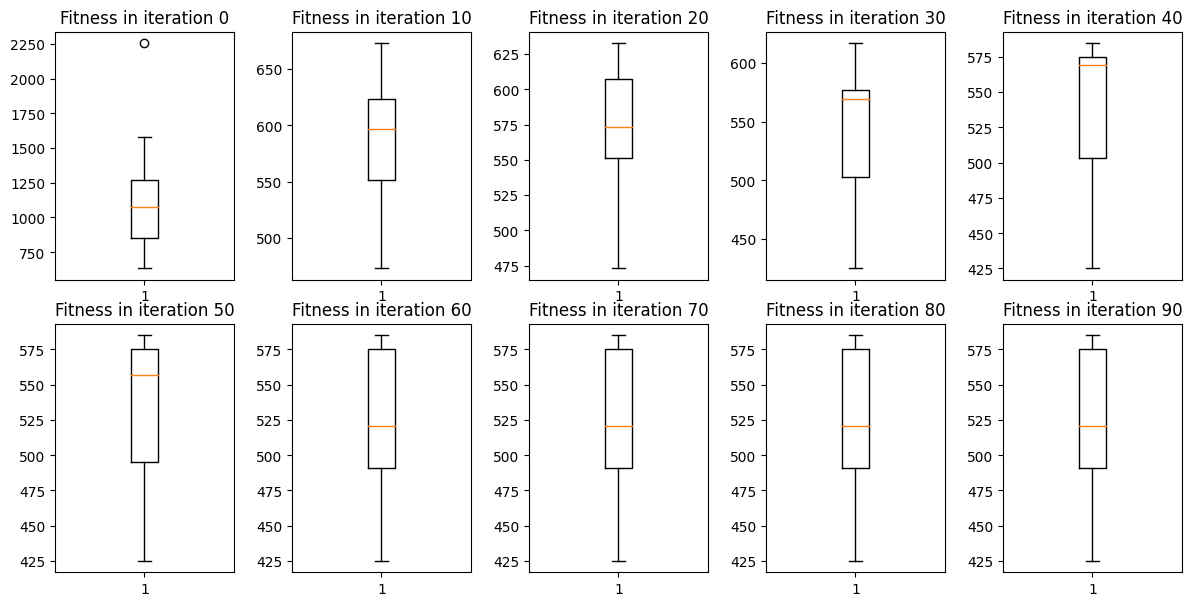

In [22]:
draw_fitness_boxplots(follow_best_distinct_fitness_observers)

## Repel Worst Gravity

In [23]:
from repel_worst_gravity import RepelWorstGravity

In [24]:
repel_worst_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in repel_worst_fitness_observers:
    run_genetic_algorithm(RepelWorstGravity, 0.5, observers=[fitness_observer])

[2024-06-02 20:02:41,941] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:02:41,943] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:02:41,950] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:02:41,951] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-02 20:02:44,177] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:02:44,180] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:02:44,181] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:02:44,185] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:02:44,185] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 481
Computing time: 2.2388479709625244


[2024-06-02 20:02:46,560] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:02:46,560] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:02:46,562] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:02:46,566] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:02:46,567] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 401
Computing time: 2.3808000087738037


[2024-06-02 20:02:48,808] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:02:48,814] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:02:48,815] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:02:48,820] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:02:48,822] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 449
Computing time: 2.253246784210205


[2024-06-02 20:02:51,168] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:02:51,175] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:02:51,177] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:02:51,181] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:02:51,182] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 497
Computing time: 2.3538951873779297


[2024-06-02 20:02:53,508] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:02:53,514] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:02:53,516] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:02:53,519] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:02:53,520] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 489
Computing time: 2.338789939880371


[2024-06-02 20:02:55,769] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:02:55,772] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:02:55,773] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:02:55,779] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:02:55,779] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 449
Computing time: 2.2582411766052246


[2024-06-02 20:02:57,996] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:02:57,999] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:02:58,000] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:02:58,004] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:02:58,005] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 449
Computing time: 2.2270474433898926


[2024-06-02 20:03:00,243] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:03:00,250] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:00,251] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:00,256] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:00,257] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 441
Computing time: 2.2513649463653564


[2024-06-02 20:03:02,487] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:03:02,489] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:02,490] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:02,496] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:02,497] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 449
Computing time: 2.238783121109009


[2024-06-02 20:03:04,957] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 473
Computing time: 2.4757096767425537


In [25]:
repel_worst_fitness_mean, repel_worst_fitness_std = get_fitness_mean_and_std(repel_worst_fitness_observers)

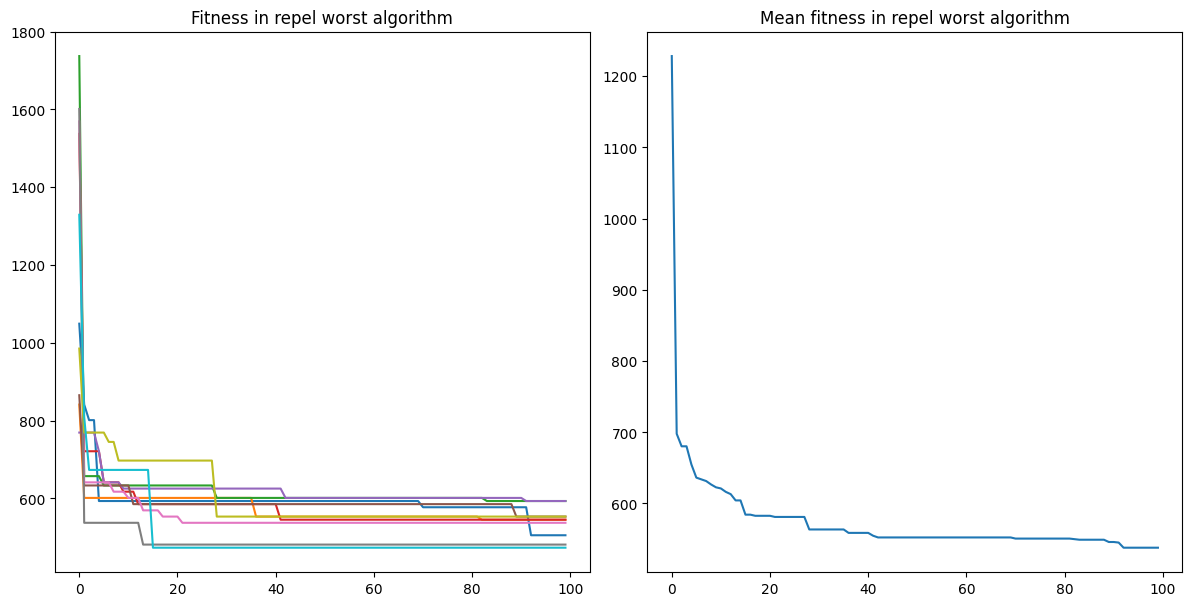

In [26]:
draw_fitness_plots(repel_worst_fitness_observers, repel_worst_fitness_mean, "repel worst")

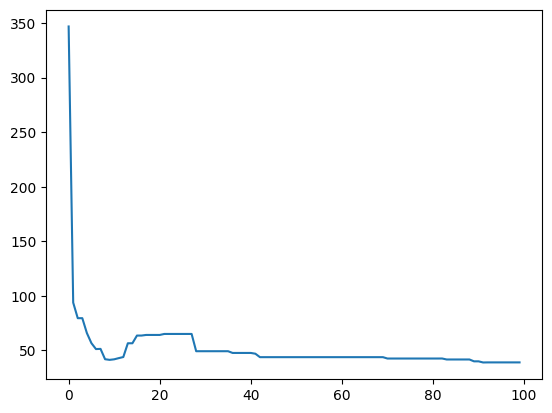

In [27]:
plt.plot(iterations_axis, repel_worst_fitness_std)
plt.show()

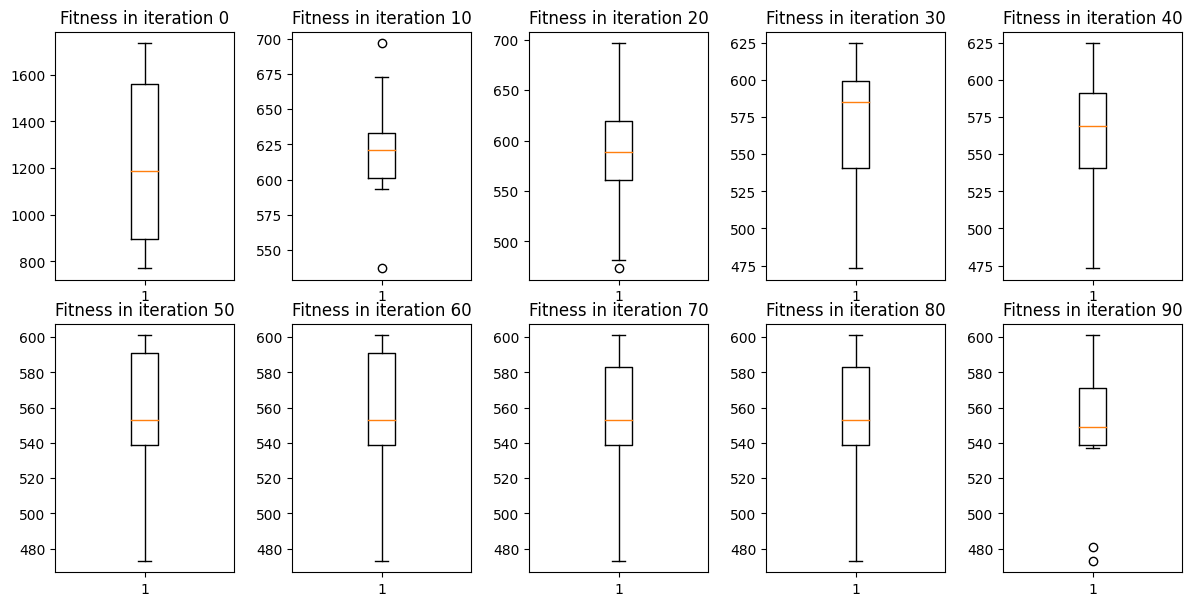

In [28]:
draw_fitness_boxplots(repel_worst_fitness_observers)

## Repel Worst Gravity Multistep

In [29]:
from repel_worst_gravity_multistep import RepelWorstGravityMultistep

In [30]:
repel_worst_multistep_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in repel_worst_multistep_fitness_observers:
    run_genetic_algorithm(RepelWorstGravityMultistep, 0.5, observers=[fitness_observer])

[2024-06-02 20:03:06,788] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:06,790] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:06,795] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:06,796] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-02 20:03:09,540] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:03:09,547] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:09,548] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:09,552] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:09,554] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 425
Computing time: 2.759443998336792


[2024-06-02 20:03:12,160] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:03:12,170] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:12,171] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:12,176] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:12,176] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 401
Computing time: 2.622215986251831


[2024-06-02 20:03:14,808] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:03:14,818] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:14,820] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:14,823] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:14,824] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 449
Computing time: 2.64703106880188


[2024-06-02 20:03:17,607] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:03:17,607] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:17,609] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:17,613] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:17,613] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 449
Computing time: 2.789613962173462


[2024-06-02 20:03:20,183] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:03:20,190] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:20,192] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:20,195] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:20,196] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 497
Computing time: 2.582599639892578


[2024-06-02 20:03:22,849] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:03:22,850] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:22,851] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:22,856] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:22,856] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 377
Computing time: 2.6604819297790527


[2024-06-02 20:03:25,581] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:03:25,584] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:25,585] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:25,590] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:25,591] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 457
Computing time: 2.734081983566284


[2024-06-02 20:03:28,230] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:03:28,235] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:28,236] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:28,241] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:28,241] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 441
Computing time: 2.650858163833618


[2024-06-02 20:03:30,882] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-02 20:03:30,888] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-02 20:03:30,890] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-02 20:03:30,894] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-02 20:03:30,895] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 425
Computing time: 2.6524627208709717


[2024-06-02 20:03:33,613] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 417
Computing time: 2.7279505729675293


In [31]:
repel_worst_multistep_fitness_mean, repel_worst_multistep_fitness_std = get_fitness_mean_and_std(repel_worst_multistep_fitness_observers)

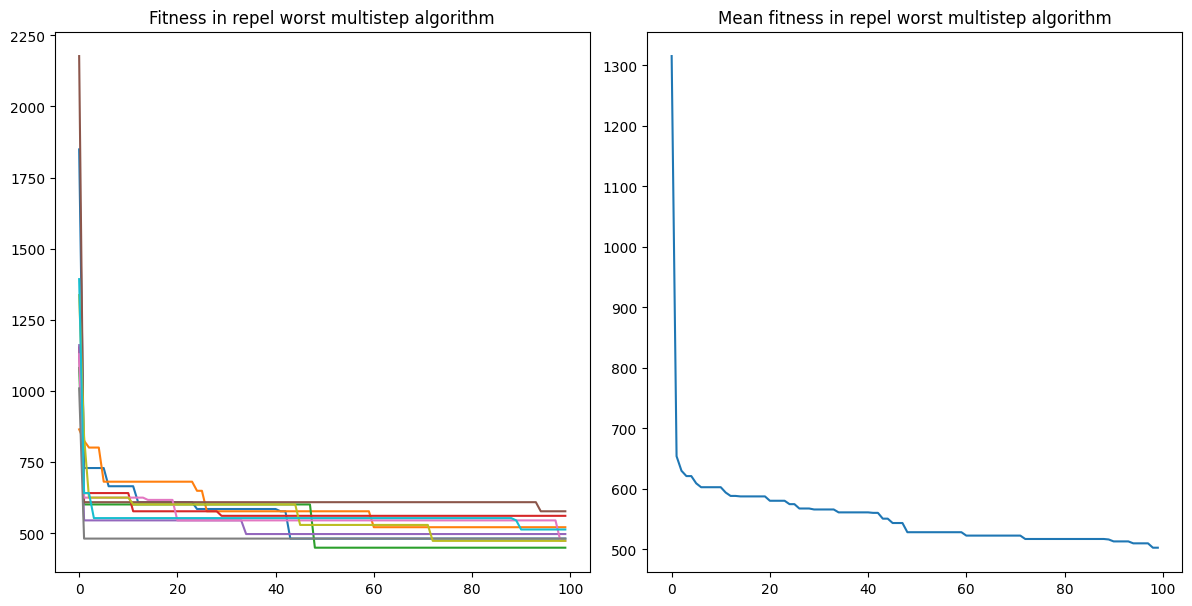

In [32]:
draw_fitness_plots(repel_worst_multistep_fitness_observers, repel_worst_multistep_fitness_mean, "repel worst multistep")

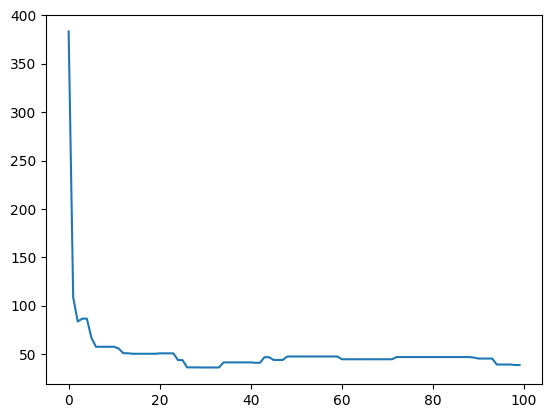

In [33]:
plt.plot(iterations_axis, repel_worst_multistep_fitness_std)
plt.show()

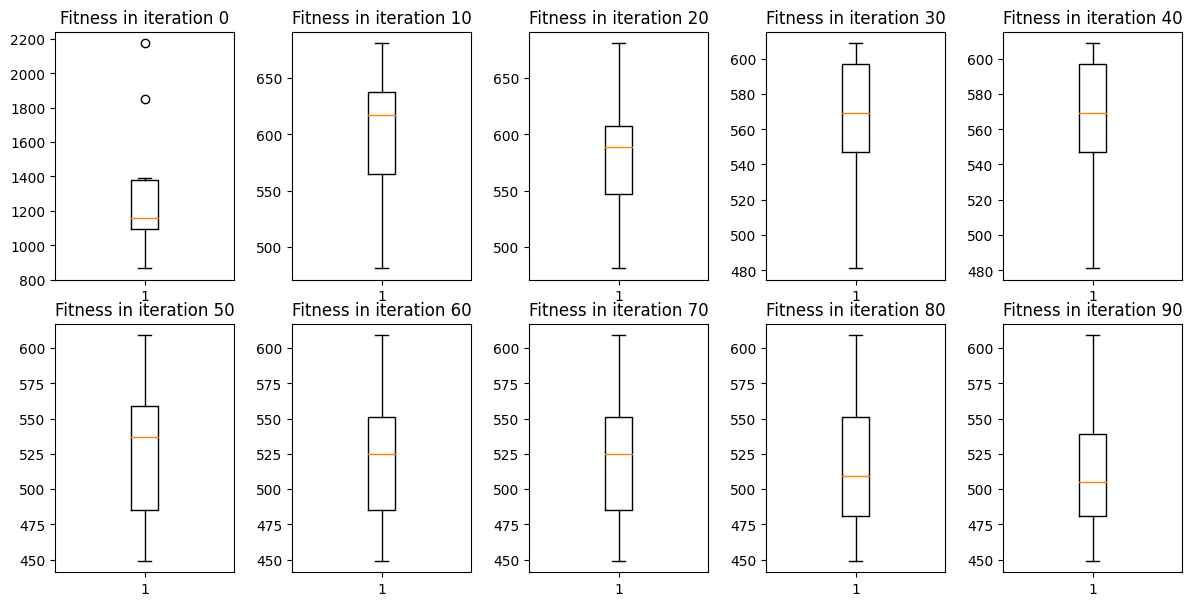

In [34]:
draw_fitness_boxplots(repel_worst_multistep_fitness_observers)

## Comparison

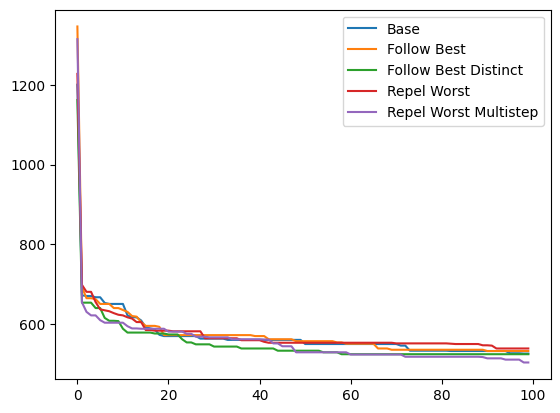

In [35]:
plt.plot(iterations_axis, base_fitness_mean, label="Base")
plt.plot(iterations_axis, follow_best_fitness_mean, label="Follow Best")
plt.plot(iterations_axis, follow_best_distinct_fitness_mean, label="Follow Best Distinct")
plt.plot(iterations_axis, repel_worst_fitness_mean, label="Repel Worst")
plt.plot(iterations_axis, repel_worst_multistep_fitness_mean, label="Repel Worst Multistep")
plt.legend()
plt.show()